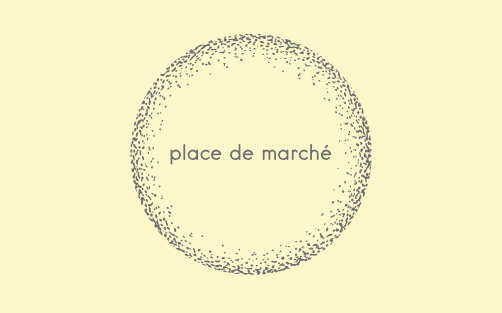

<h1><center> ETUDE DE FAISABILITE

# Sommaire <a id="0"></a>



I.  [Importation des bibliothèques, fonction communes et revue préliminaire des données](#1)<br>

II.[ Etude à partir des données textuelles](#2)<br>

>II.1 [Bag of words](#2.1)<br>
II.2 [word/sentence embedding classique](#2.2)<br>
II.3 [BERT](#2.3)<br>
II.4 [Universal Sentence Encoder](#2.4)<br>

III.[Etude à partir des Images](#3)<br>
>    III.1 [Import des images et librairies spécifiques au CV ](#3.1)<br>
    III.2 [Analyse et transformation d'une image](#3.2)<br>
    III.3 [SIFT](#3.3)<br>
    III.4 [CNN & Transfer Learning](#3.4)<br>


# I. Importation des bibliothèques et revue préliminaire des données <a id="1"></a>

## I.1 Bibliothèques <a id="1.1"></a>
Dans cette section nous importons les bibliothèques nécessaires au projet

In [1]:
# Import librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#word2vec
from gensim.models import Word2Vec

In [3]:
import tensorflow as tf
import multiprocessing

In [4]:
#reduction de dimension tsne
from sklearn.manifold import TSNE

In [5]:
#clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

## I.2 Importation des fonctions communes <a id="1.2"></a>

Nous avons créé un fichier p6_utils qui contient les fonctions communes au projet : 
- `tokenizer` : pré-traitement de la description des produits à savoir le nettoyage et la tokenization. 
- `reduction_SVD`: réduction de dimension de type TruncatedSDV 
reduction_pca : réduction de dimension de type pca <br>
- `kmeans_clustering` : fonction qui va nous permettre d'effectuer le clustering Kmeans et d'analyser le nombre de produits par catégorie 
- `plot_cats` : fonction qui va nous permettre de visualiser les vrais catégories en deux dimensions 
- `plot_and_compare`: fonction qui va nous permettre de comparer visuellement les catégories résultantes du clustering aux vraies catégories
- `cloud_img` : visualisation sous forme de nuages de mots.

In [6]:
from p6_utils import*

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## I.3 Importation  et revue préliminaires des données

In [7]:
#import du fichier
data = pd.read_csv('Data\\flipkart_com-ecommerce_sample_1050.csv')

In [8]:
#aperçu des premières lignes
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [9]:
# informations sur le nombre d'entrées et les type de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

### Identification des colonnes utiles pour la description des produits

In [10]:
# Aperçu product names
for i in data.loc[0:5,'product_name']: print(i,'\n')

Elegance Polyester Multicolor Abstract Eyelet Door Curtain 

Sathiyas Cotton Bath Towel 

Eurospa Cotton Terry Face Towel Set 

SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet 

Jaipur Print Cotton Floral King sized Double Bedsheet 

Maserati Time R8851116001 Analog Watch  - For Boys 



In [11]:
# Aperçu description
for i in data.loc[0:3,'description']: print(i,'\n')

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you 

Nous créons une colonne prod_desc qui va concatener la colonne product name et la colone description

In [12]:
data.loc[:,'prod_desc']=data.loc[:,'product_name']+' '+data.loc[:,'description']

### Analyse des colonnes de catégories

In [13]:
#aperçu des premiers produits
for i in data.loc[0:3,'product_category_tree']: print(i,'\n')

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."] 

["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."] 

["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."] 

["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."] 



In [14]:
#nombre de catégories uniques
len(data['product_category_tree'].unique())

642

In [15]:
data['product_category_tree'].value_counts()

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1
Name: product_categor

Notre objectif est d'avoir une segmentation de produits exploitable, nous identifier le nombre de catégories uniques pour la catégorie principale et chaque sous catégorie.

In [16]:
main_cat=data['product_category_tree'].str.split('>>', expand=True)
main_cat.describe()

0                1             2         3  \
count                 1050             1050          1047       679   
unique                   7               63           246       350   
top     ["Home Furnishing    Wrist Watches    Deodorants    Combos    
freq                   150              149            65        64   

                4               5  \
count         405             127   
unique        297             117   
top      Dresses    Wow! Dresses    
freq           21               3   

                                                        6  
count                                                  57  
unique                                                 57  
top      Mom and Kid Baby Girl's Printed Green Top & P...  
freq                                                    1

Nous allons utiliser uniquement la catégorie principale qui présente 7 catégories différentes

In [17]:
#rajout d'une colonne avec la catégorie principale
data['main_prod_category']=main_cat[0].str.replace('["','', regex=False).astype('category')

Nous rajoutons une colonne 'true_label' qui va recueillir les codes des catégories

In [18]:
data['true_label']=data['main_prod_category'].cat.codes

In [19]:
#Nombre de produits par catégorie
data[['true_label','main_prod_category']].value_counts()

true_label  main_prod_category         
0           Baby Care                      150
1           Beauty and Personal Care       150
2           Computers                      150
3           Home Decor & Festive Needs     150
4           Home Furnishing                150
5           Kitchen & Dining               150
6           Watches                        150
dtype: int64

Nous créons des variables qui vont nous servir pour nos analyses

In [20]:
#nombre de catégories
n_cat=len(data['main_prod_category'].unique())
n_cat

7

In [21]:
true_labels=data['true_label'] # série contenant le numéro de catégorie de chaque produit
cat_names=set(data['main_prod_category']) #nom des catégories

[Retour au Sommaire ](#0)

# II. Etude à partir des données textuelles  <a id="2"></a>

II.1 [Bag of words](#2.1)<br>
> II.1.1 [Comptage simple](#2.1)<br>
>- [unigram](#2.1.1.a)<br>
>- [bigram](#2.1.1.b)<br>

> II.1.2 [TF-IDF](#2.1.2)<br>
>- [unigram](#2.1.2.a)<br>
>- [bigram](#2.1.2.b)<br>

II.2 [word/sentence embedding classique](#2.3)<br>
II.3 [BERT](#2.4)<br>
II.4 [Universal Sentence Encoder](#2.5)<br>

## II.1 Bag of words <a id="2.1"></a>
### II.1.1  Comptage simple

#### II.1.1. a)  Unigram <a id="2.1.1.a"></a>

In [69]:
# vectorizer
bow_vector = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1))
bow_transformed=bow_vector.fit_transform(data['prod_desc'])

In [70]:
#nombre de mots
len(bow_vector.vocabulary_)

5575

In [71]:
bow_reduced=reduction_SVD(bow_transformed,150, n_iter=7, verbose=True)

Pourcentage de variance expliquée pour 150 components: 78.83%
Dimension après réduction de dimension: (1050, 150)


C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 38.5 s
Wall time: 7.43 s


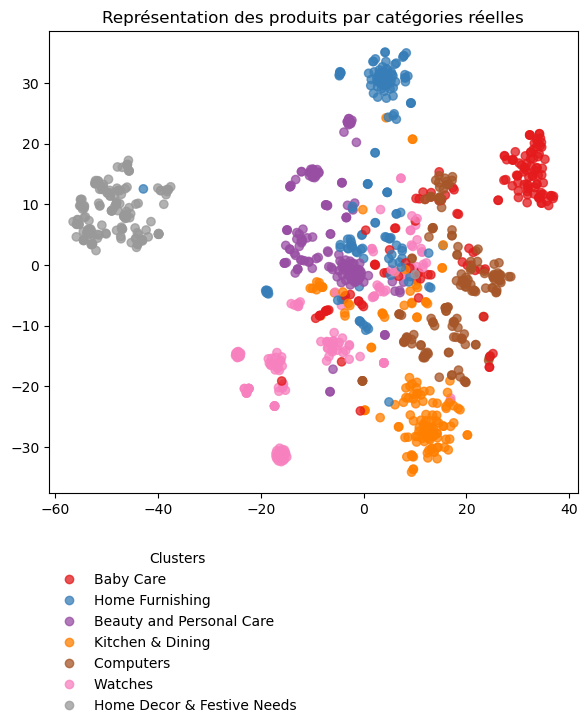

In [72]:
%%time
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000, 
                                 init='pca', learning_rate='auto', n_jobs=-1)
bow_tsne = tsne.fit_transform(bow_reduced)

plot_cats(bow_tsne, true_labels, cat_names)

In [73]:
bow_kmeans, labels=kmeans_clustering(bow_tsne, n_cat)

Num prod_desc per cluster      %
4                        239  22.76
3                        213  20.29
0                        170  16.19
1                        150  14.29
5                        101   9.62
2                         94   8.95
6                         83   7.90

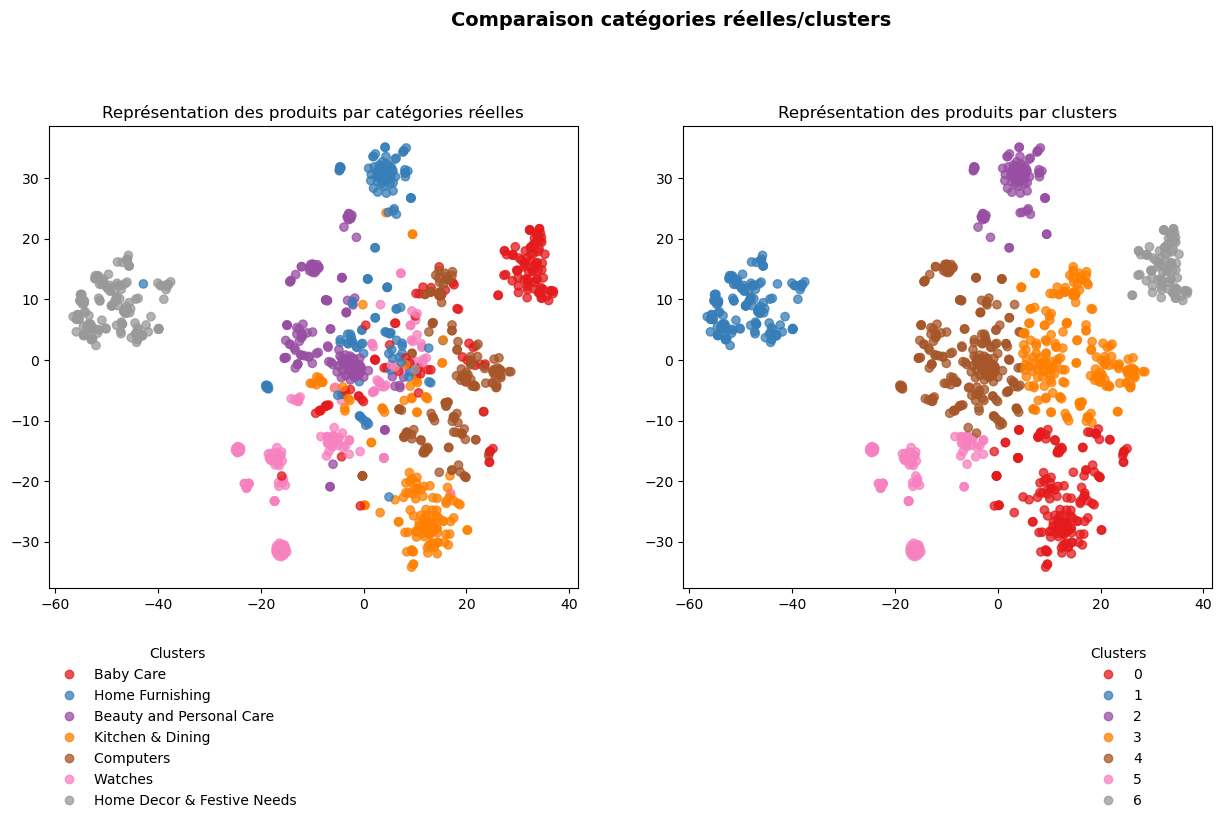

----------------

ARI score:  0.4623


In [74]:
plot_and_compare(bow_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

#### II.1.1 b)  Bigrams  <a id="2.1.1.b"></a>

In [75]:
# vectorizer
bow_vector = CountVectorizer(tokenizer = tokenizer, ngram_range=(2,2))
bow_transformed=bow_vector.fit_transform(data['prod_desc'])

In [76]:
#nombre de mots
len(bow_vector.vocabulary_)

21602

In [77]:
bow_reduced=reduction_SVD(bow_transformed,300, n_iter=7, verbose=True)

Pourcentage de variance expliquée pour 300 components: 78.46%
Dimension après réduction de dimension: (1050, 300)


C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 39.7 s
Wall time: 7.71 s


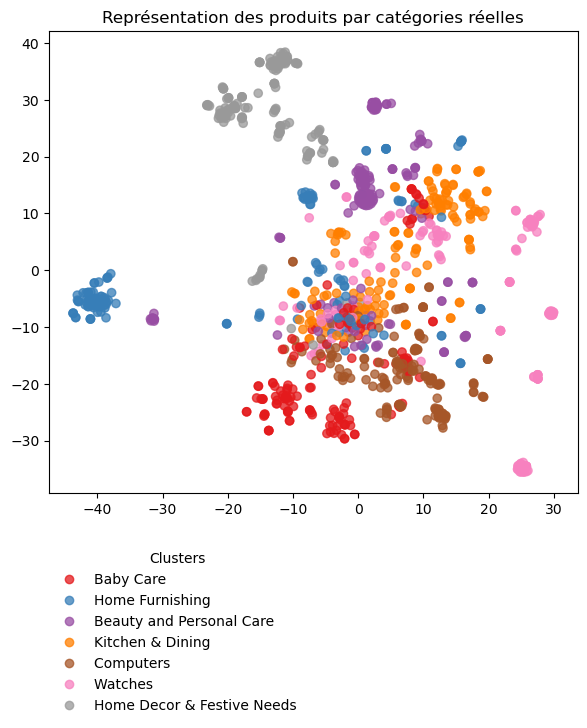

In [78]:
%%time
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000, 
                                 init='pca', learning_rate='auto', n_jobs=-1)
bow_tsne = tsne.fit_transform(bow_reduced)

plot_cats(bow_tsne, true_labels, cat_names)

In [79]:
bow_kmeans, labels=kmeans_clustering(bow_tsne, n_cat)

Num prod_desc per cluster      %
4                        213  20.29
1                        197  18.76
6                        172  16.38
0                        167  15.90
5                        116  11.05
3                        112  10.67
2                         73   6.95

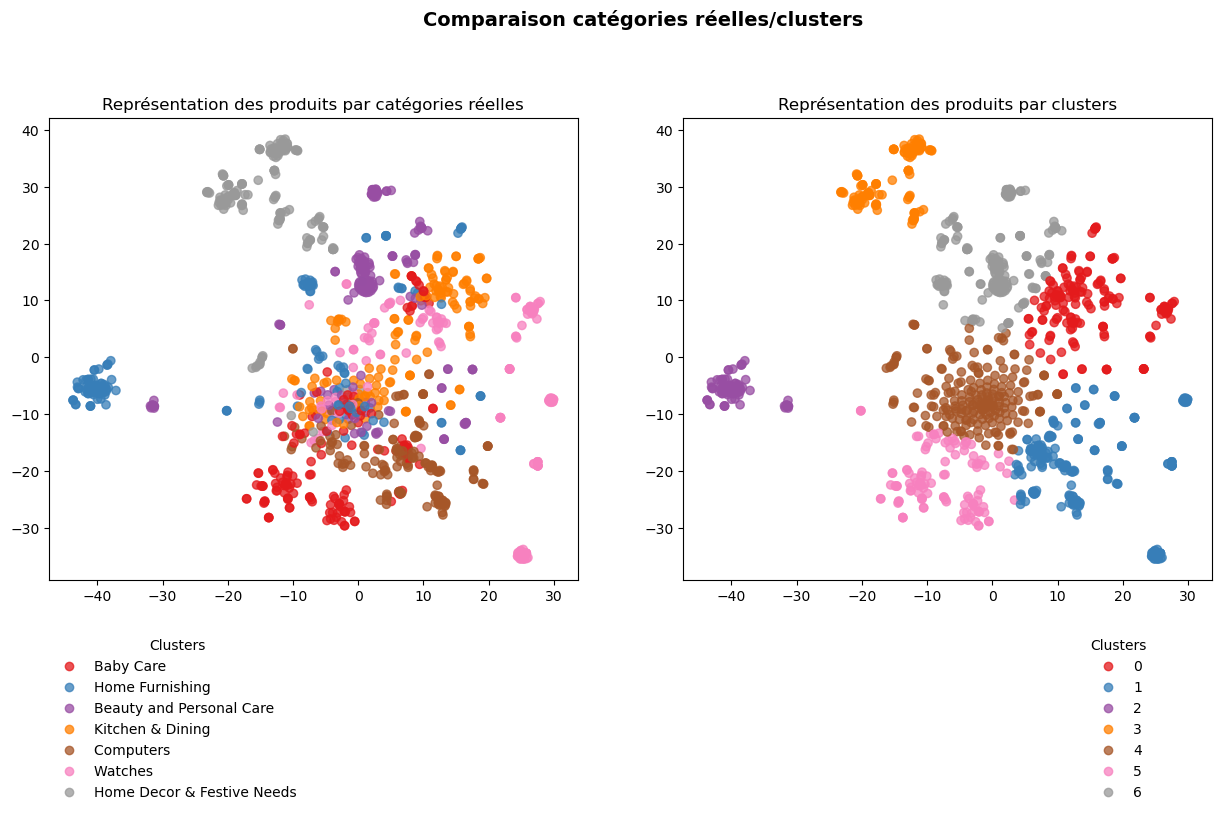

----------------

ARI score:  0.286


In [80]:
plot_and_compare(bow_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

### II.1.2  TF-IDF  <a id="2.1.2"></a>

#### II.1.2. a)  Unigram  <a id="2.1.2.a"></a>

In [81]:
# vectorizer
bow_vector = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,1))

In [82]:
bow_transformed=bow_vector.fit_transform(data['prod_desc'])

Visualizing weights of each feature computed by the fit method call 

In [83]:
idf_dic=dict(zip(bow_vector.get_feature_names_out(),bow_vector.idf_))

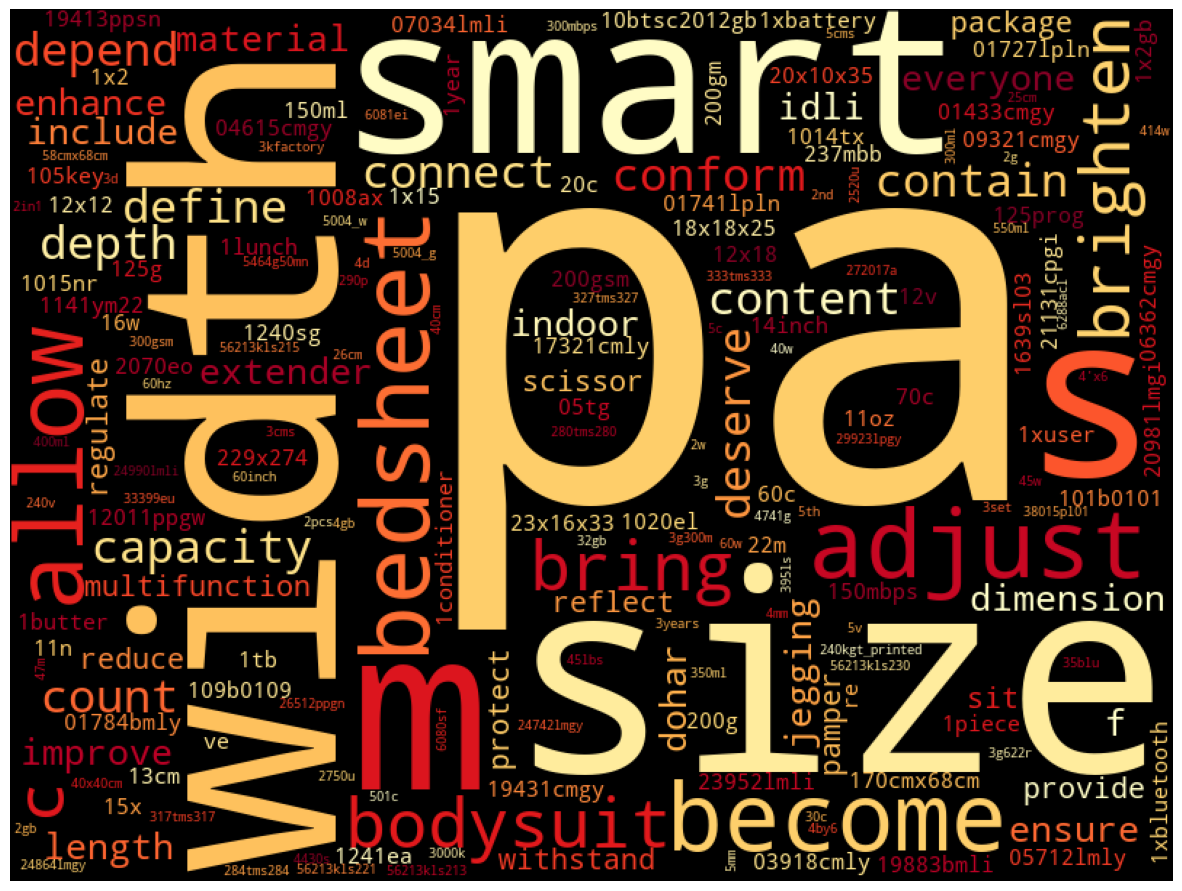

In [84]:
fig, ax1 =plt.subplots(figsize=(15,15))
cloud1 = cloud_img(idf_dic)
ax1.imshow(cloud1)
ax1.axis('off')
plt.show()

In [85]:
bow_reduced=reduction_SVD(bow_transformed,400, n_iter=7)

Pourcentage de variance expliquée pour 400 components: 75.98%
Dimension après réduction de dimension: (1050, 400)


In [86]:
%%time
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, 
                                 init='pca', learning_rate='auto')
bow_tsne = tsne.fit_transform(bow_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 1min 9s
Wall time: 13.6 s


In [87]:
bow_kmeans, labels=kmeans_clustering(bow_tsne, n_cat)

Num prod_desc per cluster      %
5                        200  19.05
3                        192  18.29
1                        192  18.29
0                        151  14.38
4                        121  11.52
2                        105  10.00
6                         89   8.48

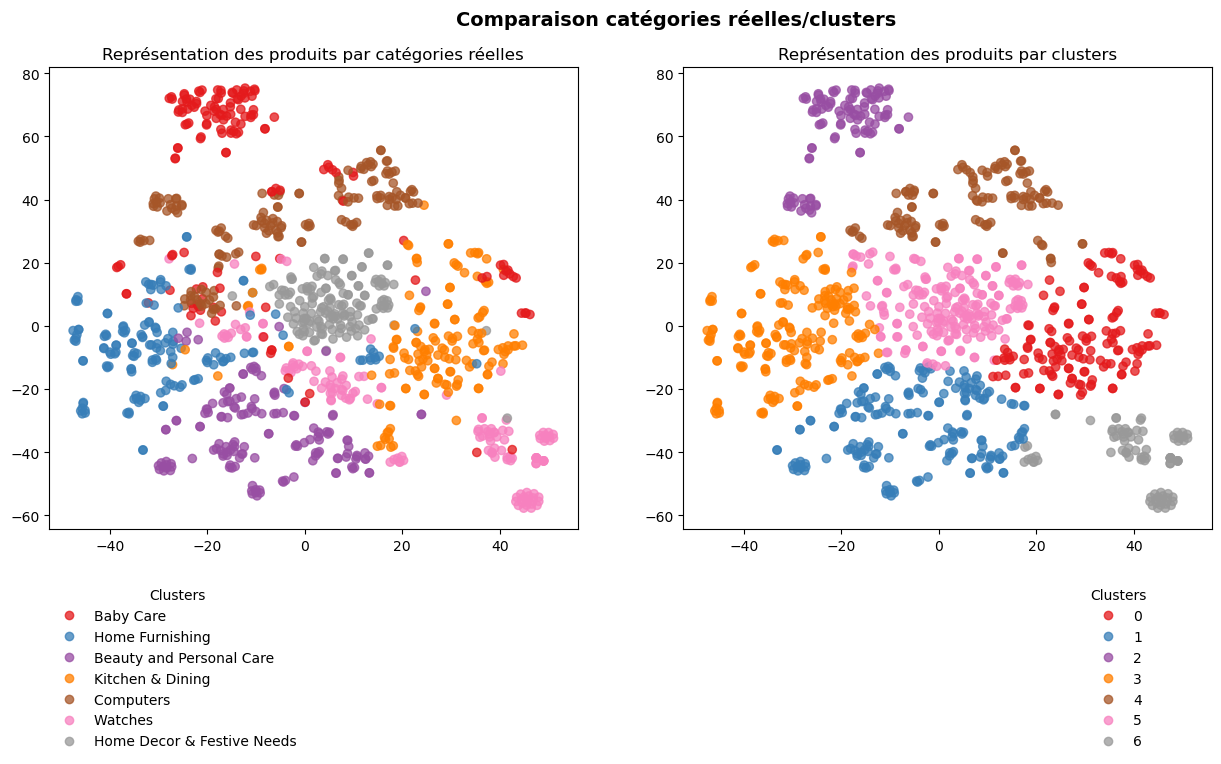

----------------

ARI score:  0.529


In [88]:
plot_and_compare(bow_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

#### II.1.2 b)  Bigrams  <a id="2.1.2.b"></a>

In [89]:
# vectorizer
bow_vector = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(2,2))

In [90]:
bow_transformed=bow_vector.fit_transform(data['prod_desc'])

In [91]:
bow_reduced=reduction_SVD(bow_transformed,600, n_iter=7)

Pourcentage de variance expliquée pour 600 components: 78.12%
Dimension après réduction de dimension: (1050, 600)


In [92]:
%%time
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, 
                                 init='pca', learning_rate='auto')
bow_tsne = tsne.fit_transform(bow_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 43.3 s
Wall time: 8.44 s


In [93]:
bow_kmeans, labels=kmeans_clustering(bow_tsne, n_cat)

Num prod_desc per cluster      %
4                        280  26.67
1                        184  17.52
6                        183  17.43
2                        145  13.81
3                        142  13.52
0                         95   9.05
5                         21   2.00

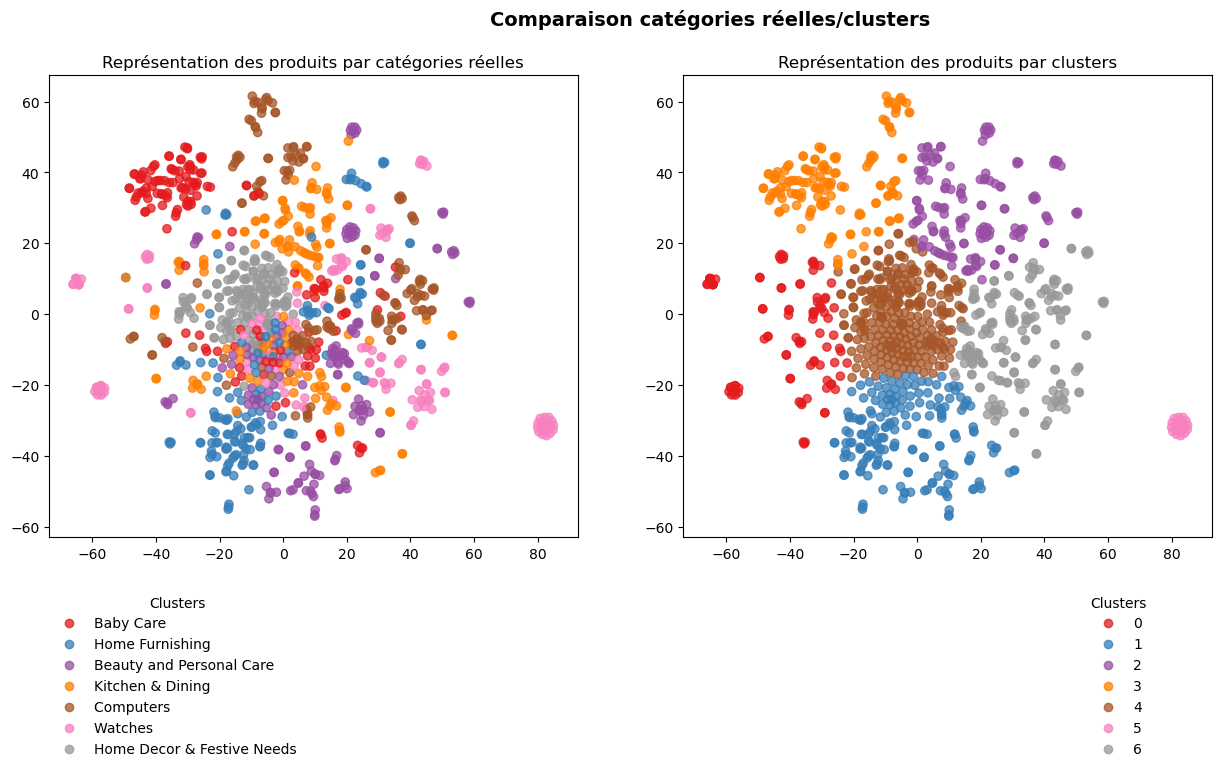

----------------

ARI score:  0.1877


In [94]:
plot_and_compare(bow_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

# II.3 Word sentence embedding <a id="2.3"></a>

### II.3.1 Word embedding avec word2vec

In [22]:
#preprocessing
descriptions=data['prod_desc'].apply(lambda x: tokenizer(x)).to_list()

In [23]:
%%time
#création et paramétrage du modèle
cores=multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=5, #Ignores all words with total absolute frequency lower than this
                     window=5,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=0,
                     workers=cores-1)

CPU times: total: 0 ns
Wall time: 899 µs


In [24]:
#création de la table de vocabulaire
w2v_model.build_vocab(descriptions)

In [25]:
%%time
#entrainement du modèle

w2v_model.train(corpus_iterable=descriptions, 
                total_examples=w2v_model.corpus_count, #count of sentences
                epochs=30, # Number of iterations over the corpus. 
                report_delay=1)

CPU times: total: 438 ms
Wall time: 363 ms


(645204, 2085090)

In [26]:
#vocabulary size
len(w2v_model.wv.index_to_key)

1858

Visualisation du vocabulaire (note : la taille des mots ne représente pas la fréquence car chaque mot apparait une seule fois dans le corpus)

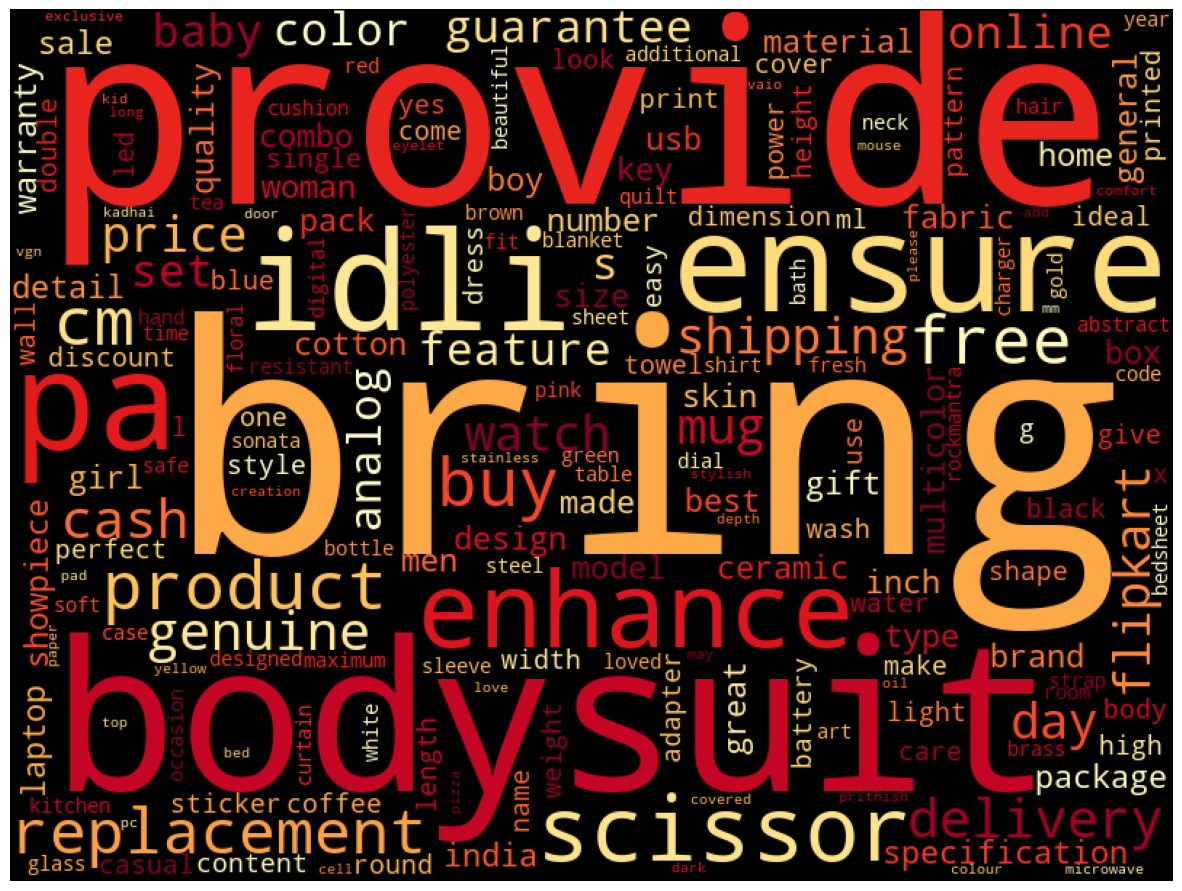

In [36]:
fig, ax1 =plt.subplots(figsize=(15,15))
cloud1 = cloud_img(w2v_model.wv.index_to_key)
ax1.imshow(cloud1)
ax1.axis('off')
plt.show()

In [37]:
%%time
#création de la matrice d'embedding
prod_desc=[]
#création d'un vecteur de description pour chaque produit
for i in range(0,len(descriptions)):
    words_in_desc=set(descriptions[i])-(set(descriptions[i])-set(w2v_model.wv.index_to_key))
    desc_vec=w2v_model.wv[words_in_desc]
    desc_vec=np.mean(desc_vec,axis=0)
    prod_desc.append(desc_vec)
#creation de la matrice
embedding_matrix=np.vstack(prod_desc)
embedding_matrix.shape

CPU times: total: 141 ms
Wall time: 146 ms


(1050, 300)

### II.3.2 Réduction de dimension et clustering

In [47]:
emb_reduced=reduction_SVD(embedding_matrix,120, n_iter=7)

Pourcentage de variance expliquée pour 120 components: 89.98%
Dimension après réduction de dimension: (1050, 120)


In [57]:
%%time
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000, 
                                 init='pca', learning_rate='auto')
emb_tsne = tsne.fit_transform(emb_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 57.5 s
Wall time: 11.4 s


In [58]:
emb_kmeans, labels=kmeans_clustering(emb_tsne, n_cat)

Num prod_desc per cluster      %
2                        185  17.62
4                        177  16.86
6                        162  15.43
5                        153  14.57
1                        146  13.90
3                        135  12.86
0                         92   8.76

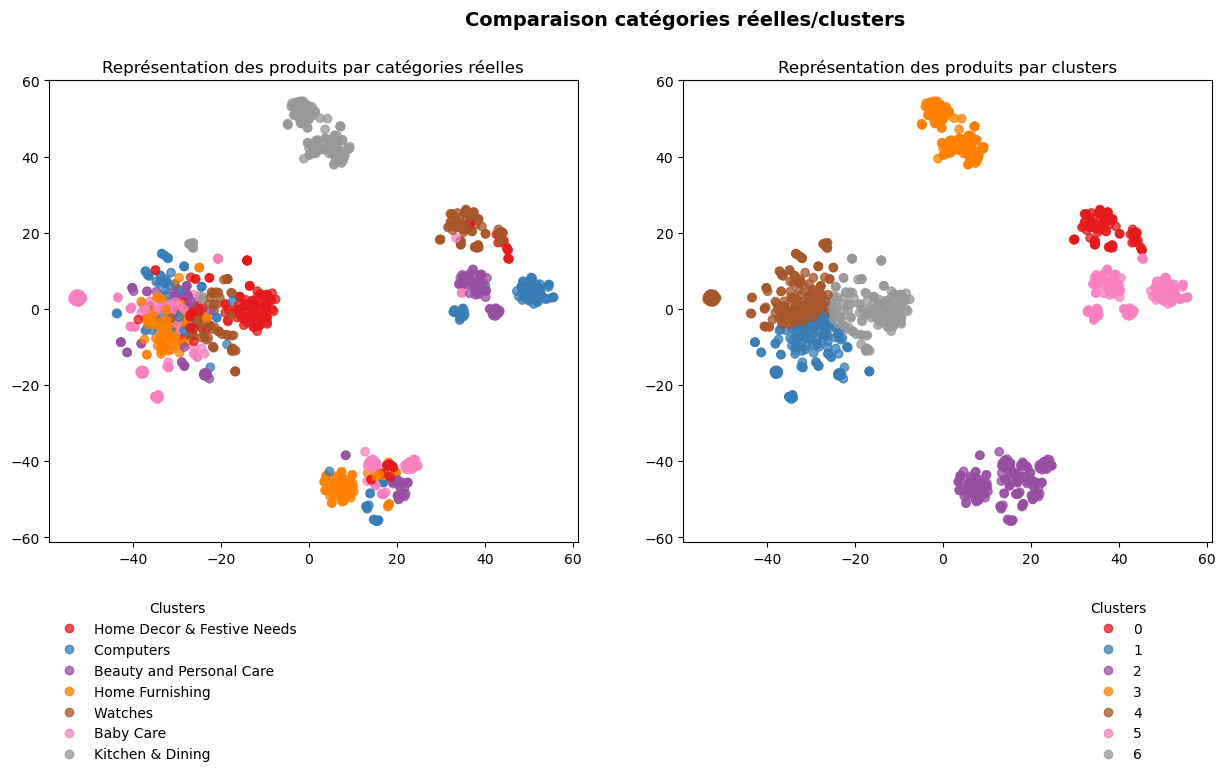

----------------

ARI score:  0.3111


In [59]:
plot_and_compare(emb_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

# II.4 Bert <a id="2.4"></a>

## II.4.1 Création de la matrice d'embedding

In [22]:
from transformers import BertTokenizer, TFBertModel

In [23]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [24]:
inputs = tokenizer(data['prod_desc'].to_list(), return_tensors="tf", padding=True, truncation=True)

In [25]:
%%time
outputs = model(inputs)

CPU times: total: 1h 59min 26s
Wall time: 43min 55s


In [26]:
last_hidden_states = outputs.last_hidden_state

In [27]:
bert_embedding = np.array(last_hidden_states).mean(axis=1)

### II.4.2 Réduction de dimension et clustering

In [36]:
emb_reduced=reduction_SVD(bert_embedding,100, n_iter=7)

Pourcentage de variance expliquée pour 100 components: 93.68%
Dimension après réduction de dimension: (1050, 100)


In [49]:
%%time
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, 
                                 init='pca', learning_rate='auto')
emb_tsne = tsne.fit_transform(emb_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 42.6 s
Wall time: 8.39 s


In [50]:
emb_kmeans, labels=kmeans_clustering(emb_tsne, n_cat)

Num prod_desc per cluster      %
3                        190  18.10
4                        186  17.71
6                        166  15.81
1                        153  14.57
2                        140  13.33
0                        121  11.52
5                         94   8.95

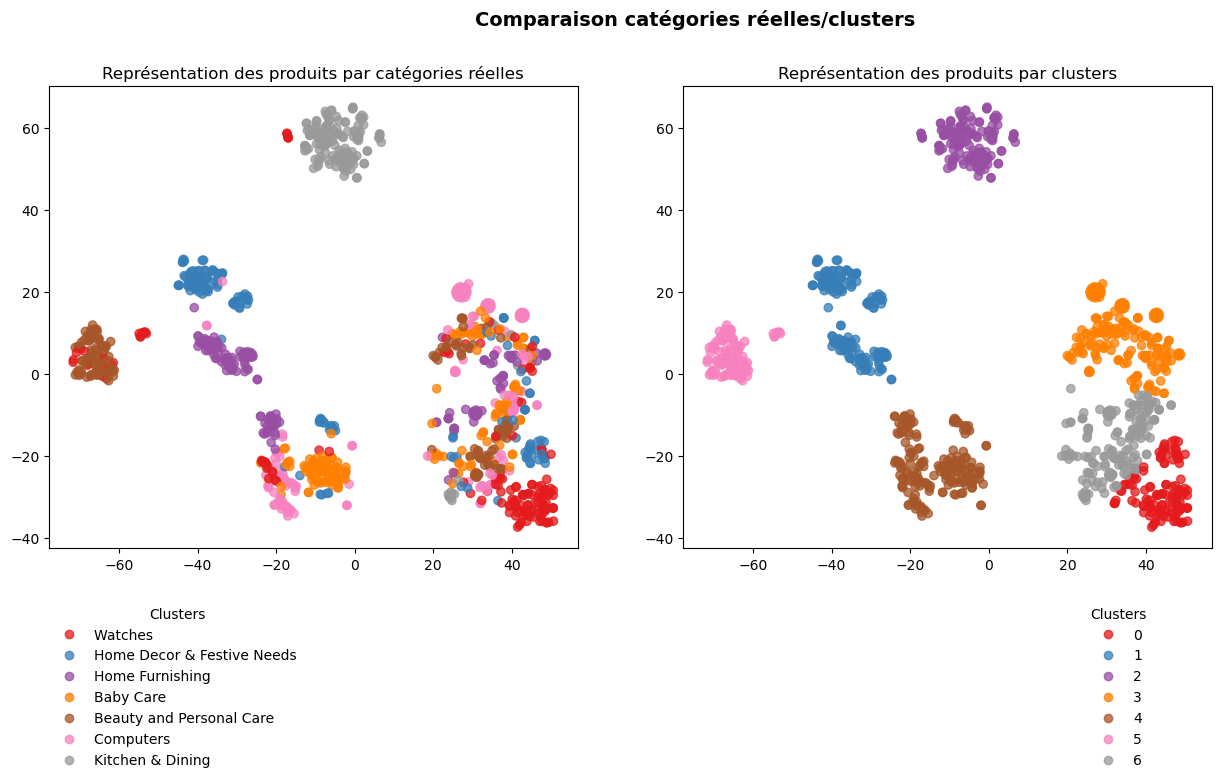

----------------

ARI score:  0.3081


In [51]:
plot_and_compare(emb_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

# II.5 Universal sentence encoder <a id="2.5"></a>

In [105]:
#Load the Universal Sentence Encoder's TF Hub module
import tensorflow_hub as hub

module_url="https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Pour ce modèle nous n'appliquons pas la fonction de preprocessing.

"The module does not require preprocessing the data before applying the module"
Source https://tfhub.dev/google/universal-sentence-encoder/4: 

In [106]:
desc_embeddings=embed(data['prod_desc'])

In [107]:
desc_embeddings.shape

TensorShape([1050, 512])

In [108]:
emb_reduced=reduction_SVD(desc_embeddings,80, n_iter=7)

Pourcentage de variance expliquée pour 80 components: 80.71%
Dimension après réduction de dimension: (1050, 80)


In [115]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, 
                                 init='pca', learning_rate='auto')
emb_tsne = tsne.fit_transform(emb_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [116]:
emb_kmeans, labels=kmeans_clustering(emb_tsne, n_cat)

Num prod_desc per cluster      %
0                        196  18.67
1                        190  18.10
3                        176  16.76
2                        149  14.19
4                        136  12.95
5                        123  11.71
6                         80   7.62

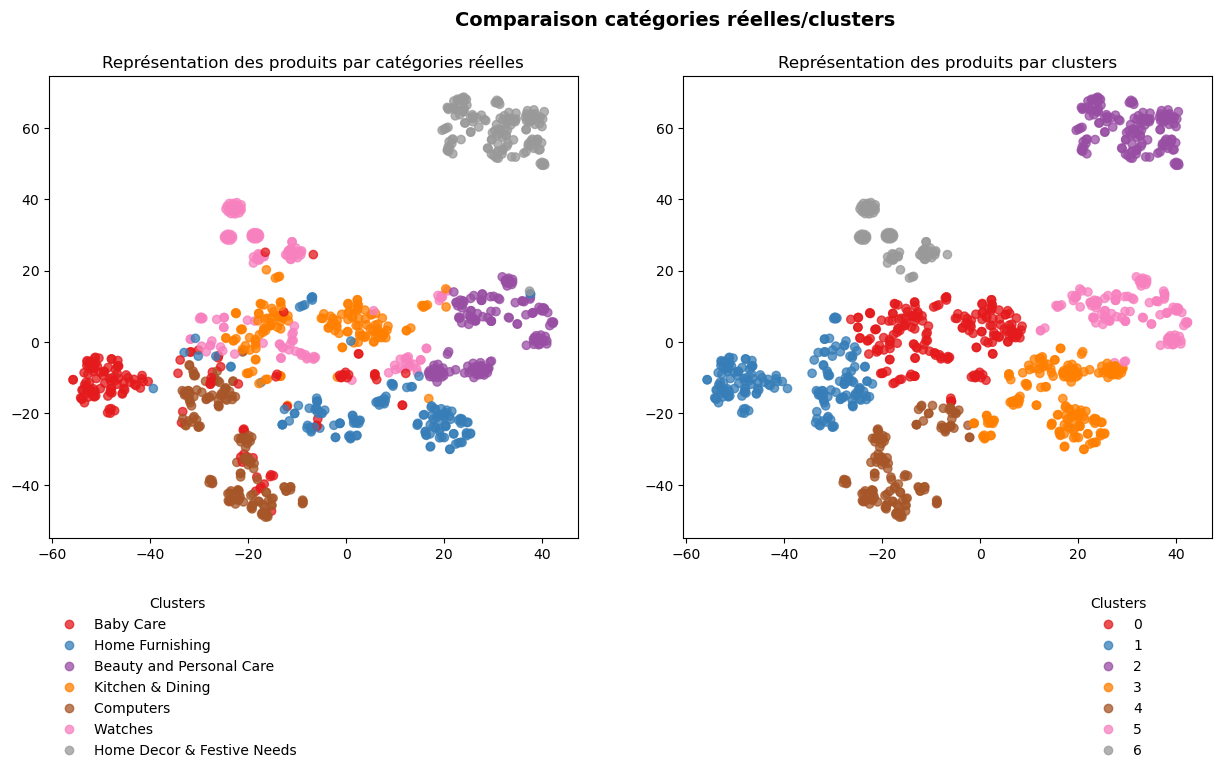

----------------

ARI score:  0.5074


In [117]:
plot_and_compare(emb_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#2)

[Retour au Sommaire ](#0)

# III. Etude à partir des images <a id="3"></a>

 III.1 [Import des images et librairies spécifiques au CV ](#3.1)<br>
 III.2 [Analyse et transformation d'une image](#3.2)<br>
 III.3 [SIFT](#3.3)<br>
 > III.3.1 [Détermination et affichage des descripteurs SIFT pour une image](#3.3.1)<br>
 III.3.2 [Créations des descripteurs pour toutes les images](#3.3.2)<br>
 III.3.3 [Création des clusters de descripteurs](#3.3.3)<br>
 III.3.4 [Création des features vectors](#3.3.4)<br>
 III.3.5 [Réduction de dimension et clustering](#3.3.5)<br>

 III.4 [CNN & Transfer Learning](#3.4)<br>
> III.4.1 [Prédiction VGG16 sur une image](#3.4.1)<br>
III.4.2 [Transfer learning](#3.4.2)<br>

# III.1 Import des images et librairies spécifiques au CV <a id="3.1"></a>

In [22]:
import cv2 #computer vision librairies

In [23]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance

Récupérons le nom des images et le chemin pour accéder au dossier contenant les images

In [24]:
images=data['image']
path="Data/Images/"

# III.2 Analyse et transformation d'une image <a id="3.2"></a>

Dans cette section nous explorong la bibliothèque PIL et différentes transformations d'une image au hasard.

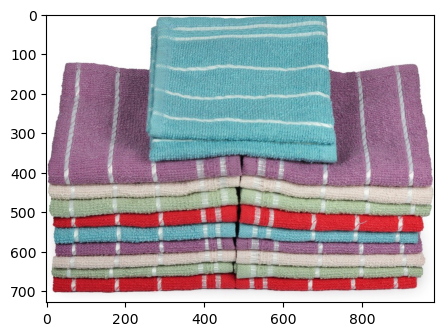

In [29]:
# Charger l'image
img = Image.open(path+images[2]) 

# Afficher l'image chargée
fig, ax1 =plt.subplots(figsize=(5,5))
ax1.imshow(img)
plt.show()

In [30]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 982 px, hauteur : 729 px


In [31]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (30,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (30,100) : (255, 255, 255)


In [32]:
# Récupérer les valeurs de tous les pixels sous forme d'une matrice
image = np.array(img)

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(image.shape))

Taille de la matrice de pixels : (729, 982, 3)


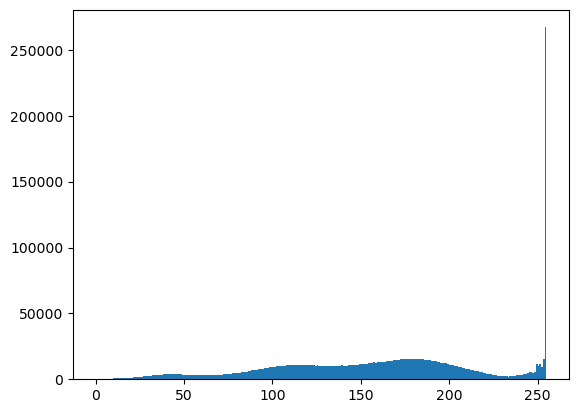

In [33]:
#histogramme de l'image
n, bins, patches = plt.hist(image.flatten(), bins=range(256))

**Exemples de transformations**

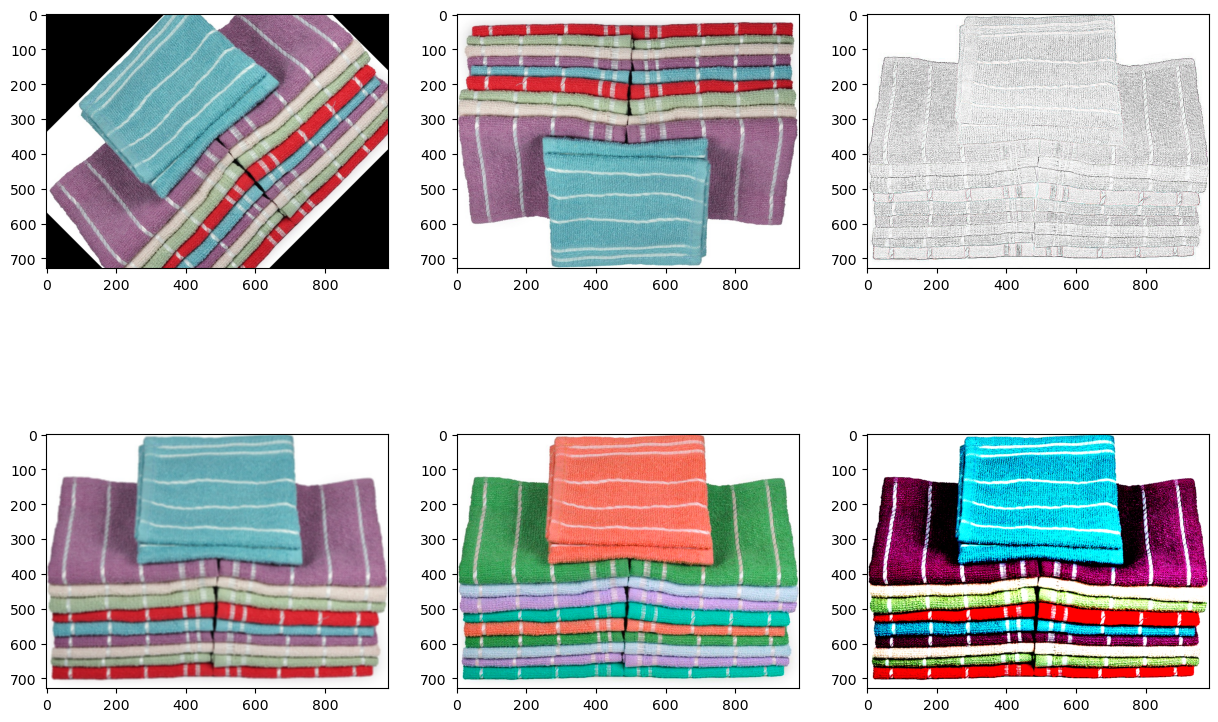

In [34]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) =plt.subplots(2,3,figsize=(15,10))

ax1.imshow(img.rotate(angle=45)) #rotation
ax2.imshow(img.transpose(method=3)) #transpose
ax3.imshow(img.filter(ImageFilter.CONTOUR)) #filter countour
ax4.imshow(img.filter(ImageFilter.BLUR)) #filter blur
ax5.imshow(ImageEnhance.Color(img).enhance(-2))
ax6.imshow(ImageEnhance.Contrast(img).enhance(5))

plt.show()

[Retour au début de section ](#3)

## III.3 SIFT <a id="3.3"></a>

### III.3.1 Détermination et affichage des descripteurs SIFT pour une image <a id="3.3.1"></a>
Nous prenons l'exmple d'une image pour comprendre comment fonctionne l'algorithme

Taille de l'image originale :  (1293, 2388)
Taille de l'image modifiée :  (258, 477)


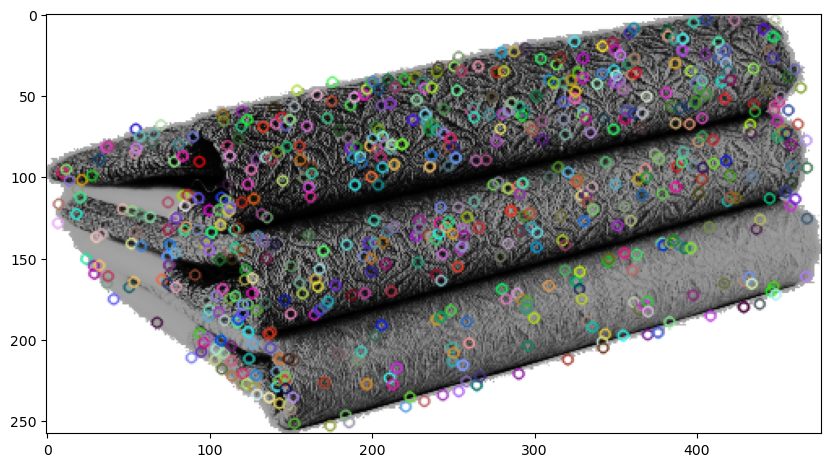

l'image contient 718 descripteurs de dimension 128 


In [35]:
sift = cv2.SIFT_create()

#prétraitements
image = cv2.imread(path+images[1], 0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram

#réduction de la taille de l'image
h,l=image.shape
print("Taille de l'image originale : ",image.shape)
image=cv2.resize(image, (int(l*0.2),int(h*0.2)))
print("Taille de l'image modifiée : ",image.shape)

#calcul et affichage des descripteurs
keypoints, descriptors = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,keypoints,image)

fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(img)
plt.show()

print("l'image contient {} descripteurs de dimension {} ".format(descriptors.shape[0],descriptors.shape[1]))

### III.3.2 Créations des descripteurs pour toutes les images <a id="3.3.2"></a>

In [36]:
%%time
all_descriptors=[]
for i in range(len(images)):
    image = cv2.imread(path+images[i], 0) # convert in gray
    image = cv2.equalizeHist(image)   # equalize image histogram
    image=cv2.resize(image, (int(l*0.3),int(h*0.3))) #réduction de la taille de l'image
    keypoints, descriptors = sift.detectAndCompute(image, None)
    all_descriptors.append(descriptors)

descriptors_matrix=np.concatenate(all_descriptors, axis=0)    

CPU times: total: 3min 6s
Wall time: 47.3 s


In [37]:
descriptors_matrix.shape

(1425746, 128)

### III.3.3 Création des clusters de descripteurs <a id="3.3.3"></a>

In [38]:
%%time
# Determination number of clusters
k = int(round(np.sqrt(descriptors_matrix.shape[0]),0))
print("Nombre de clusters estimés : ", k)

# Clustering
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, batch_size=3072)
kmeans.fit(descriptors_matrix)

Nombre de clusters estimés :  1194
CPU times: total: 1min 13s
Wall time: 14.7 s


MiniBatchKMeans(batch_size=3072, init_size=3582, n_clusters=1194)

### III.3.4 Création des features vectors <a id="3.3.4"></a>
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Définition de la fonction permettant de créer l'histogramme (feature vector) de chaque image

In [39]:
def build_histogram(kmeans, des, image_num):
    '''création de l' histogramme d'une image
    Inputs : 
        kmeans : clustering de descripteurs déjà entraînés
        des : np.array des descripteurs d'une image
        image_numn : numéro de l'image
    Outputs :
        hist : feature vector contenant l'histogramme de l'image
    '''
    res = kmeans.predict(des)
    hist = np.zeros(kmeans.cluster_centers_.shape[0])
    nb_des=des.shape[0]
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


Création de la matrice de feature vectors

In [40]:
%%time
# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(all_descriptors) :
      
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

CPU times: total: 5min 21s
Wall time: 1min 5s


In [41]:
im_features.shape

(1050, 1194)

### III.3.5 Réduction de dimension et clustering <a id="3.3.5"></a>

In [42]:
X_reduced=reduction_pca(im_features,0.8)

Pourcentage de variance expliquée pour 144 components: 80.09%
Dimension après réduction de dimension: (1050, 144)


In [43]:
%%time
tsne = TSNE(n_components=2, perplexity=90, n_iter=5000, 
                                 init='pca', learning_rate='auto')
image_tsne = tsne.fit_transform(X_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 43.4 s
Wall time: 8.53 s


In [44]:
img_kmeans, labels=kmeans_clustering(image_tsne, n_cat)

Num prod_desc per cluster      %
1                        234  22.29
2                        162  15.43
3                        143  13.62
6                        141  13.43
0                        137  13.05
5                        134  12.76
4                         99   9.43

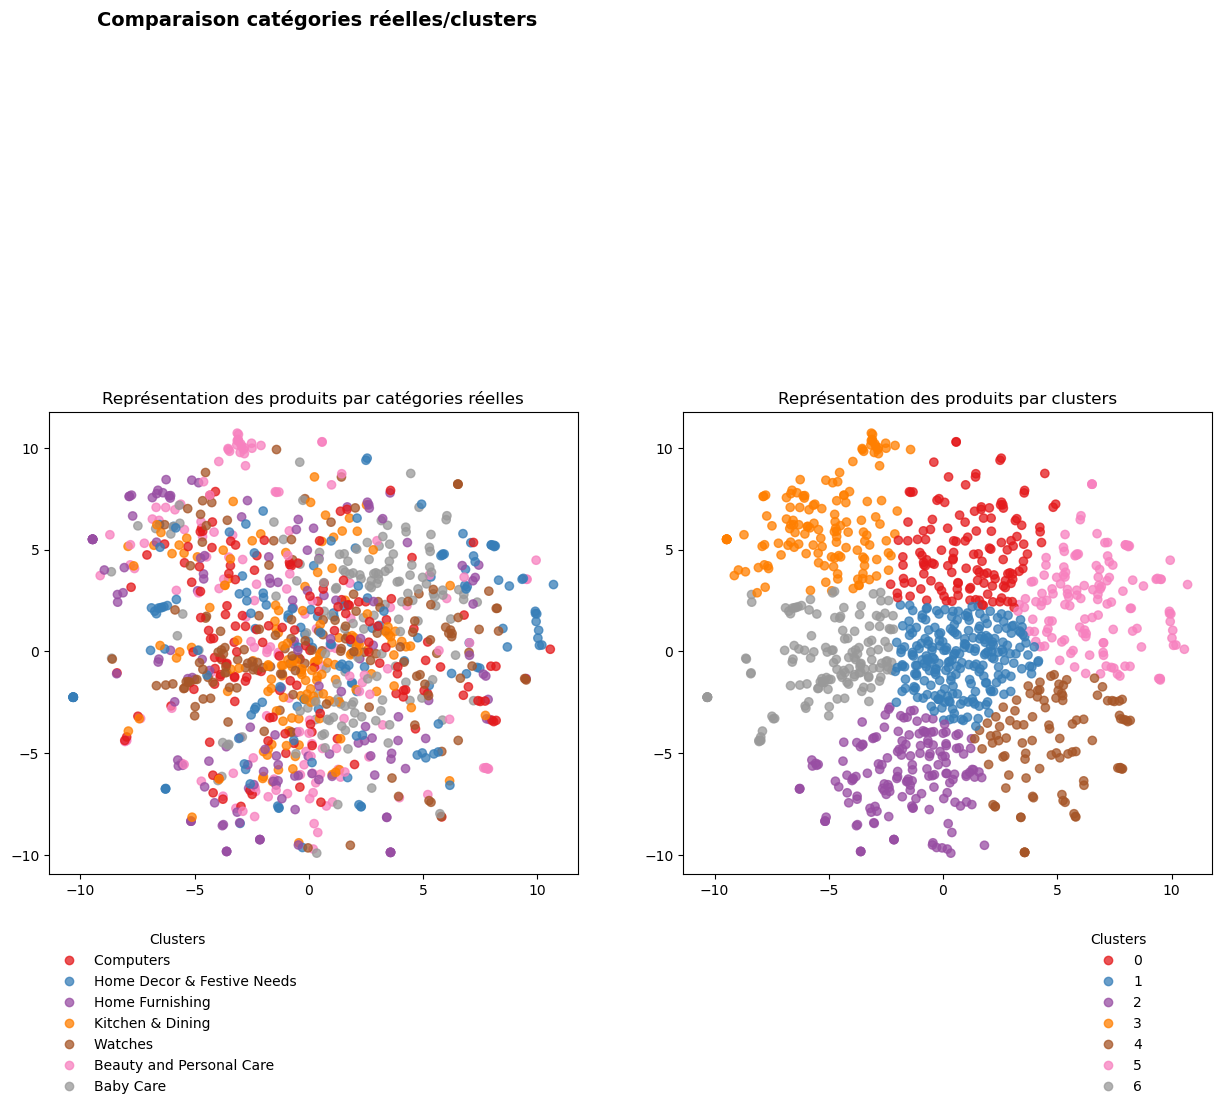

----------------

ARI score:  0.0509


In [45]:
plot_and_compare(image_tsne, labels, true_labels, cat_names)

[Retour au début de section ](#3)

## III.4 CNN & Transfer Learning <a id="3.4"></a>

## III.4.1 Prédiction VGG16 sur une image <a id="3.4.1"></a>
Afin de comprendre VGG16 nous allons le tester sur une image au hasard

In [26]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [25]:
model = VGG16() # Création du modèle VGG-16 implementé par Keras
model.summary() #affichage des couches et  paramètres du modèle

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

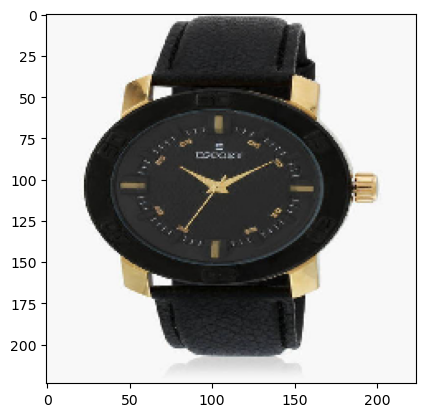

In [26]:
#preprocessing de l'image
img = tf.keras.preprocessing.image.load_img(path+images[15], target_size=(224, 224))  # Charger l'image
plt.imshow(img) #affichage de l'image
img = tf.keras.preprocessing.image.img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [27]:
#prediction de la probabilité d'appartenance au 1000 classes de VGG-16
y=model.predict(img)

1/1 [==============================] - 0s 250ms/step


In [28]:
y.shape

(1, 1000)

In [29]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n03706229', 'magnetic_compass', 0.6985368), ('n02794156', 'barometer', 0.13723193), ('n02708093', 'analog_clock', 0.13549453)]


Les 3 principales classes prédites sont : 
- 'magnetic_compass à 69.8%
- 'barometer' à 13.74%
- 'analog_clock' à 13.54%


[Retour au début de section ](#3)

## III.4.2 Transfer learning <a id="3.4.2"></a>

#### III.4.2.A Récupération des feature vectors avant la prédiction par classes

In [27]:
from keras.layers import Dense
from keras.layers import Flatten
from keras import Model

In [31]:
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model.summary()
# Récupérer la sortie de ce réseau
x = model.output

# Ajout des couches de sorties du nouveau modèle
flatten=Flatten()(x)
fc1=Dense(4096, activation='relu')(flatten)
fc2=Dense(4096, activation='relu')(fc1)


# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=fc2)

new_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
%%time
#chargement des images
images_list = []
for i in range(len(images)):
    img = tf.keras.preprocessing.image.load_img(path+images[i], target_size=(224, 224))  # Charger l'image
    img = tf.keras.preprocessing.image.img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  
    images_list.append(img)
image_set=np.concatenate(images_list, axis=0)
images_set = preprocess_input(image_set) # Prétraiter les images 

C:\Users\carol\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


CPU times: total: 16.6 s
Wall time: 23.2 s


In [33]:
feat_matrix=new_model.predict(images_set)

33/33 [==============================] - 72s 2s/step


In [34]:
feat_matrix.shape

(1050, 4096)

In [35]:
X_reduced=reduction_pca(feat_matrix,0.80)

Pourcentage de variance expliquée pour 357 components: 80.04%
Dimension après réduction de dimension: (1050, 357)


In [36]:
%%time
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000, 
                                 init='pca', learning_rate='auto')
image_tsne = tsne.fit_transform(X_reduced)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: total: 1min 3s
Wall time: 12.5 s


In [37]:
img_kmeans, labels=kmeans_clustering(image_tsne, n_cat)

Num prod_desc per cluster      %
3                        210  20.00
6                        205  19.52
0                        145  13.81
1                        142  13.52
5                        139  13.24
2                        107  10.19
4                        102   9.71

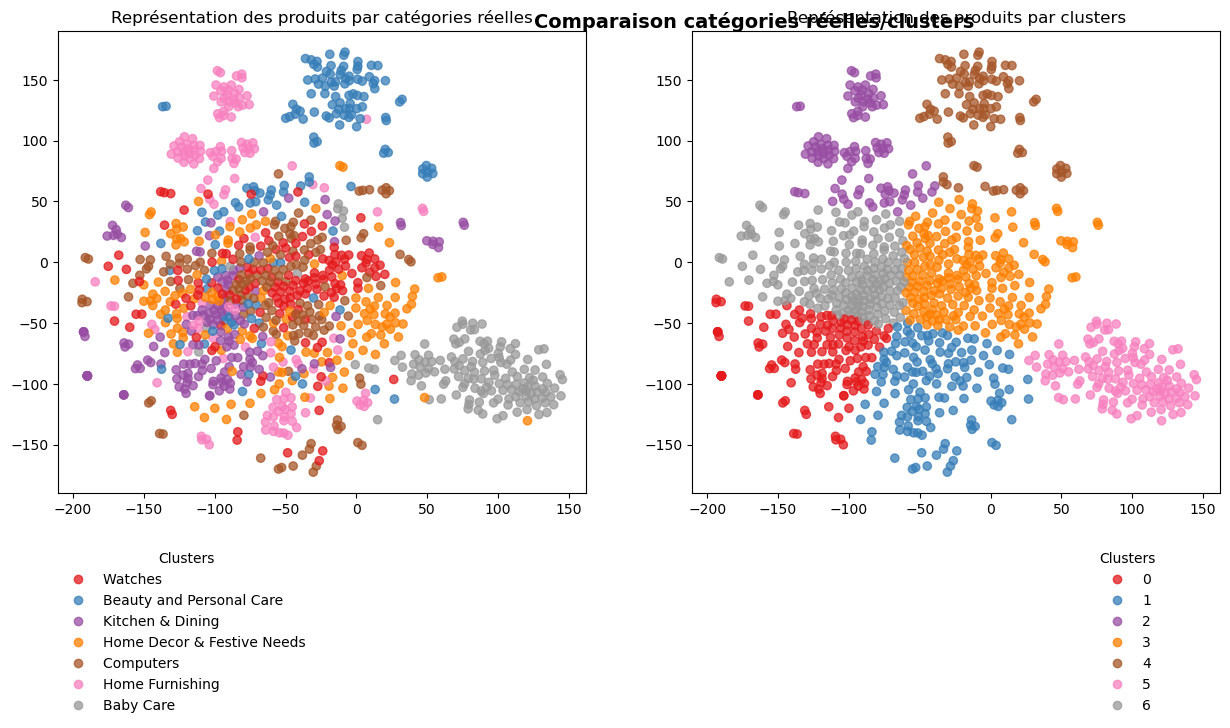

----------------

ARI score:  0.2886


In [38]:
plot_and_compare(image_tsne, labels, true_labels, cat_names)

### III.4.2.B Classification en 7 classes

In [44]:
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model.summary()
# Récupérer la sortie de ce réseau
x = model.output

# Ajout des couches de sorties du nouveau modèle
flatten=Flatten()(x)
fc1=Dense(512, activation='relu')(flatten)
predictions = Dense(7, activation='softmax')(fc1) # classification à 7 classes

# Définir le nouveau modèle
new_model2 = Model(inputs=model.input, outputs=predictions)

new_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
# Ne pas entraîner les couches de initiales
for layer in model.layers:
   layer.trainable = False

In [46]:
new_model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
# Compiler le modèle 
new_model2.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=["accuracy"])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
 X_train, X_test, y_train, y_test = train_test_split( images_set, np.array(true_labels), test_size=0.25, random_state=42)

In [50]:
%%time
# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 [==============================] - 55s 2s/step - loss: 29.7638 - accuracy: 0.6684
Epoch 2/5
25/25 [==============================] - 58s 2s/step - loss: 1.5423 - accuracy: 0.9238
Epoch 3/5
25/25 [==============================] - 59s 2s/step - loss: 0.1586 - accuracy: 0.9822
Epoch 4/5
25/25 [==============================] - 60s 2s/step - loss: 0.0345 - accuracy: 0.9975
Epoch 5/5
25/25 [==============================] - 60s 2s/step - loss: 0.0156 - accuracy: 0.9975
CPU times: total: 52min 18s
Wall time: 4min 51s


In [51]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = new_model2.evaluate(X_test, y_test)


MODEL EVALUATION:
9/9 [==============================] - 18s 2s/step - loss: 4.1225 - accuracy: 0.8213


[Retour au début de section ](#3)

[Retour au Sommaire ](#0)